# Load the Dataset and Preprccesing

### Load & Inspect the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'D:\ML_API_Task\data\global-data-on-sustainable-energy.csv'  # Replace with your local file path if necessary
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [2]:
# Get basic information about the dataset
data.info()

# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
print("Missing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [3]:
# Remove newline characters and extra spaces from column names
data.columns = data.columns.str.strip().str.replace('\n', ' ')

# Print the cleaned column names to verify
print("Cleaned Column Names:", data.columns.tolist())

Cleaned Column Names: ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


### Convert Data Types

In [4]:
# Correct numeric columns based on the verified names
numeric_columns = ['Access to electricity (% of population)', 'Access to clean fuels for cooking',
                   'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)',
                   'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)',
                   'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                   'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                   'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 
                   'gdp_per_capita', 'Density (P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']

# Use the exact column names for conversion
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Display the updated data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
# Print the current column names to verify
print("Current Column Names:", data.columns.tolist())

Current Column Names: ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


In [6]:
# Convert the identified column to numeric after removing non-numeric characters
data['Density\\n(P/Km2)'] = pd.to_numeric(data['Density\\n(P/Km2)'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

# Rename the column for easier use
data.rename(columns={'Density\\n(P/Km2)': 'Density (P/Km2)'}, inplace=True)

# Verify the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

### Handling Missing Values

In [7]:
# Recalculate missing value percentages
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Drop columns with more than 50% missing data
columns_to_drop = missing_percentage[missing_percentage > 50].index
data_cleaned = data.drop(columns=columns_to_drop)

# Identify numeric columns for imputation
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numeric columns with the median
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())

# For non-numeric columns, you can impute with mode or leave them as they are.
non_numeric_columns = data_cleaned.select_dtypes(exclude=['float64', 'int64']).columns
data_cleaned[non_numeric_columns] = data_cleaned[non_numeric_columns].fillna(data_cleaned[non_numeric_columns].mode().iloc[0])

# Display cleaned dataset information
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 6   Electricity from fossil fuels (TWh)                               3649 non-null   float64
 7   Electricity from nuclear (TWh)   

# Feature Engineering and Data Splitting

### Feature Engineering

In [8]:
from sklearn.preprocessing import StandardScaler

# Define features (excluding 'Entity' and the target variable for now)
features = data_cleaned.drop(columns=['Entity', 'Renewable energy share in the total final energy consumption (%)'])

# Define target variable
target = data_cleaned['Renewable energy share in the total final energy consumption (%)']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale features
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled features
scaled_features_df.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,-1.658303,-2.558056,-1.511702,-0.390724,-0.201180,-0.180943,-0.225954,0.857399,-0.731738,-1.050154,-0.194394,0.019872,-0.421154,-0.239339,0.012086,0.649744,0.797318
1,-1.493106,-2.476693,-1.485628,-0.392410,-0.201382,-0.180943,-0.224129,1.407966,-0.733627,-1.021065,-0.194436,0.019872,-0.421154,-0.239339,0.012086,0.649744,0.797318
2,-1.327910,-2.300326,-1.459554,-0.394236,-0.201266,-0.180943,-0.223553,1.302873,-0.734376,-1.119966,-0.194024,0.019872,-0.651813,-0.239339,0.012086,0.649744,0.797318
3,-1.162713,-2.124131,-1.425657,-0.396015,-0.200748,-0.180943,-0.222881,0.888574,-0.733826,-1.119966,-0.193763,0.990248,-0.651223,-0.239339,0.012086,0.649744,0.797318
4,-0.997517,-1.948032,-1.389153,-0.397607,-0.200690,-0.180943,-0.223553,0.768431,-0.734567,-1.178143,-0.194024,-0.375045,-0.650138,-0.239339,0.012086,0.649744,0.797318


### Split the Data

In [9]:
from sklearn.model_selection import train_test_split

# Define features (excluding 'Entity' and the target variable)
features = data_cleaned.drop(columns=['Entity', 'Renewable energy share in the total final energy consumption (%)'])

# Define target variable
target = data_cleaned['Renewable energy share in the total final energy consumption (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Verify the shapes
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (2919, 17) (2919,)
Testing set shape (X_test, y_test): (730, 17) (730,)


### Train the Model

In [10]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model with early stopping
model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=1000, 
                     early_stopping_rounds=50, eval_metric='rmse')

# Train the model with early stopping
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],  # Validation set
    verbose=True
)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Best Iteration:", model.best_iteration)

[0]	validation_0-rmse:21.36577
[1]	validation_0-rmse:15.82224
[2]	validation_0-rmse:12.06394
[3]	validation_0-rmse:9.52209
[4]	validation_0-rmse:7.78405
[5]	validation_0-rmse:6.72486
[6]	validation_0-rmse:6.03947
[7]	validation_0-rmse:5.61822
[8]	validation_0-rmse:5.25978
[9]	validation_0-rmse:5.05474
[10]	validation_0-rmse:4.87127
[11]	validation_0-rmse:4.76831
[12]	validation_0-rmse:4.70980
[13]	validation_0-rmse:4.62658
[14]	validation_0-rmse:4.55959
[15]	validation_0-rmse:4.47210
[16]	validation_0-rmse:4.40186
[17]	validation_0-rmse:4.35010
[18]	validation_0-rmse:4.33230
[19]	validation_0-rmse:4.30094
[20]	validation_0-rmse:4.25920
[21]	validation_0-rmse:4.24557
[22]	validation_0-rmse:4.21395
[23]	validation_0-rmse:4.19481
[24]	validation_0-rmse:4.17897
[25]	validation_0-rmse:4.15161
[26]	validation_0-rmse:4.13852
[27]	validation_0-rmse:4.13565
[28]	validation_0-rmse:4.11039
[29]	validation_0-rmse:4.09780
[30]	validation_0-rmse:4.08986
[31]	validation_0-rmse:4.10622
[32]	validation

### Feature Importance and Evaluation

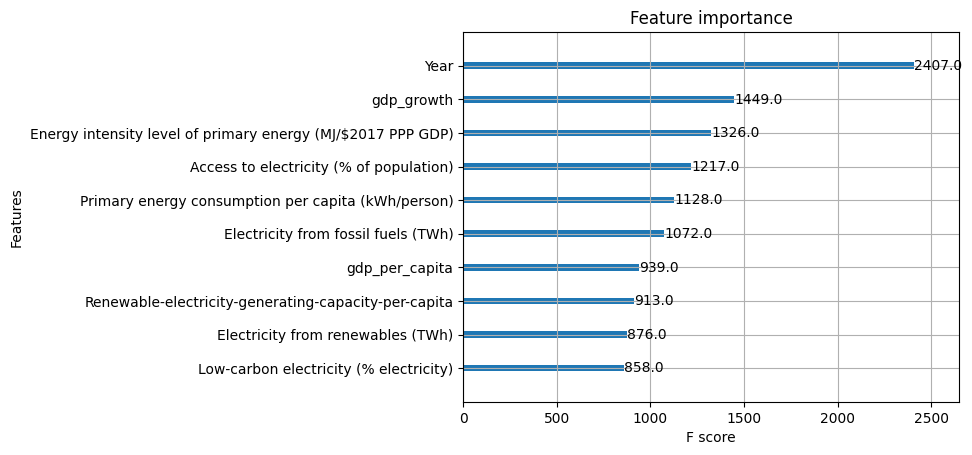

In [11]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plot_importance(model, max_num_features=10)
plt.show()

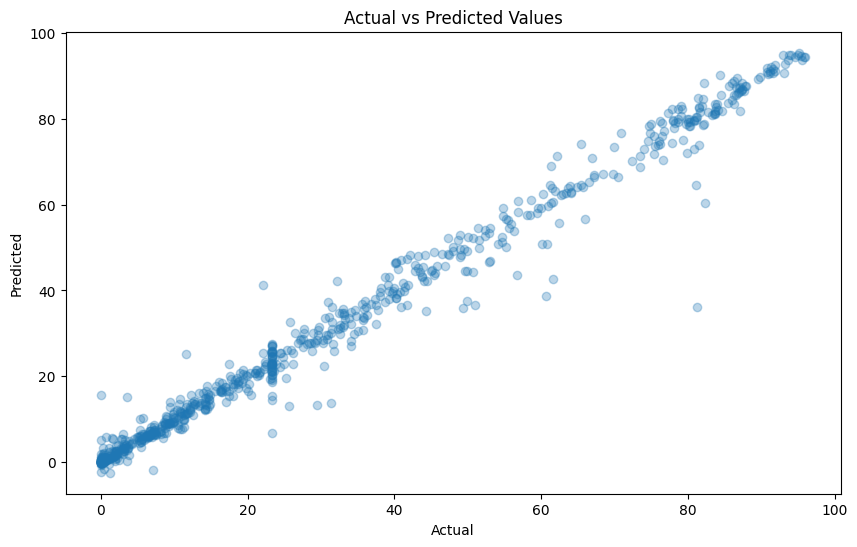

In [12]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

# Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Initialize the model without early stopping
model_cv = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=297)  # Use best iteration found

# Create a custom scorer for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation for MSE
mse_scores = cross_val_score(model_cv, X_train, y_train, cv=5, scoring=mse_scorer)

# Perform cross-validation for R2
r2_scores = cross_val_score(model_cv, X_train, y_train, cv=5, scoring='r2')

# Display cross-validation results
print("Cross-Validation MSE Scores:", mse_scores)
print("Mean MSE Score:", np.mean(mse_scores))

print("Cross-Validation R2 Scores:", r2_scores)
print("Mean R2 Score:", np.mean(r2_scores))


Cross-Validation MSE Scores: [-15.21654376 -15.5724228  -10.08240085 -14.60524536 -20.00152787]
Mean MSE Score: -15.095628128133319
Cross-Validation R2 Scores: [0.98267351 0.98236968 0.98736828 0.98197617 0.97733641]
Mean R2 Score: 0.9823448089665865


# Save the Trained Model

In [15]:
import joblib

# Save the trained model
joblib.dump(model, 'D:/ML_API_Task/models/trained_model.pkl')
print("Model saved successfully.")


Model saved successfully.
